<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 776, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 776 (delta 46), reused 86 (delta 33), pack-reused 660
Receiving objects: 100% (776/776), 23.28 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (303/303), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-_tmyxcei
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-_tmyxcei
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=8a89c14211c59ce72a511611d89853f02ce94988018fa9210d68ed024f33f3b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wix5wo29/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc909ee

In [2]:
import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-12-23 14:20:14--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.15, 52.84.251.27, 52.84.251.114, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   120MB/s    in 16s     

2023-12-23 14:20:30 (151 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from clip_embeding import ClipEmbedding
clip = ClipEmbedding()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [20]:
from PIL import Image
image_path = '../../images/'
image = Image.open(image_path+'image_1.jpg')

In [ ]:
# text = 'two dogs in a white and black couch'
texts = ['two dogs siting in a white and black couch', 'a bird eating fruit', 'a dog sleeping', 'a statue of a black man', 'a pink couch', 'a couch', 'a cat sleeping in a pink couch', 'pink', 'a cat sleeping']
texts = [f'a photo of {text}' for text in texts]

In [32]:
image_embedding = clip.get_image_embedding(image)
text_embedding = clip.get_text_embedding(texts)
print(text_embedding)

tensor([[ 0.0264,  0.0110, -0.0916,  ...,  0.0427, -0.0338, -0.0211],
        [ 0.0139,  0.0117, -0.0030,  ..., -0.0413, -0.0003, -0.0536],
        [ 0.0121,  0.0429, -0.0669,  ..., -0.0548, -0.0387,  0.0026],
        ...,
        [ 0.0261,  0.0244, -0.0463,  ..., -0.0379, -0.0454,  0.0012],
        [ 0.0150,  0.0125, -0.0584,  ...,  0.0165, -0.0276,  0.0566],
        [-0.0300,  0.0126, -0.0140,  ..., -0.0197,  0.0074, -0.0012]],
       device='cuda:0', grad_fn=<DivBackward0>)


In [33]:
for text in text_embedding:
    #print(clip.calculate_similarity(image_embedding[0], text))
    print(clip.calculate_similarity(subembeddings[10], text))

0.17360590398311615
0.1437942385673523
0.21197718381881714
0.20120172202587128
0.2825048863887787
0.23318561911582947
0.2613315284252167
0.2769262194633484


In [5]:
from clip_embeding import ProcessImages
process = ProcessImages()

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


In [23]:
subembeddings = process.get_embedding_segmentations(image_path= image_path+'image_1.jpg',segmentation= 'mask')

In [ ]:
process.ranking(image_path+'image_1.jpg')
# image_embedding = clip.get_image_embedding(image)
# print(clip.calculate_similarity(image_embedding[0], subembeddings[0]))

In [25]:
# similarity = (100.0 * image_embedding @ text_embedding.T).softmax(dim=-1)
similarity = (0.15 * image_embedding @ subembeddings.T).softmax(dim=-1)
values, indices = similarity[0].topk(10)
print (similarity)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{index}: {100 * value.item():.2f}%")

tensor([[0.0045, 0.0038, 0.0082, 0.0036, 0.2351, 0.0159, 0.0050, 0.0153, 0.0181,
         0.6581, 0.0275, 0.0047]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

Top predictions:

9: 65.81%
4: 23.51%
10: 2.75%
8: 1.81%
5: 1.59%
7: 1.53%
2: 0.82%
6: 0.50%
11: 0.47%
0: 0.45%


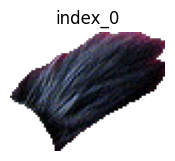

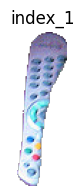

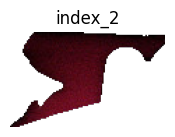

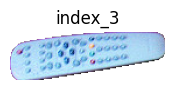

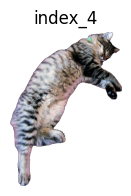

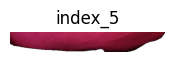

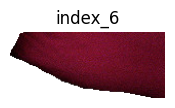

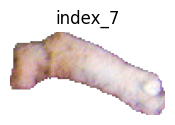

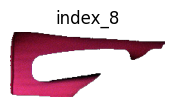

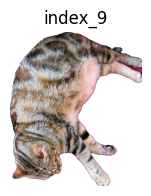

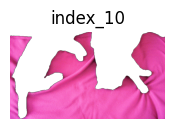

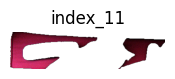

In [26]:
process.show_images()